# Airbnb Prices in Some of The Most Popular European Cities

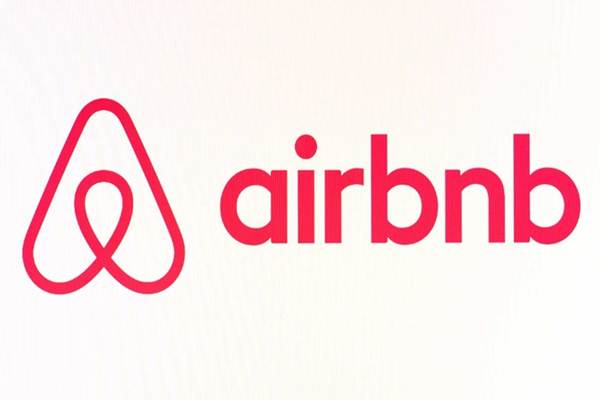

<h3 align="left">About dataset </h3>:

This dataset provides a comprehensive look at Airbnb prices in some of the most popular European cities. Each listing is evaluated for various attributes. We hope that this data set offers insight into how global markets are affected by social dynamics and geographical factors which in turn determine pricing strategies for optimal profitability!

**Dataset Column description**:

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| realSum | The total price of the Airbnb listing | (Numeric) |
| room_type | The type of room being offered (e.g. private, shared, etc.) | (Categorical) |
| room_shared | Whether the room is shared or not | (Boolean) |
| room_private | Whether the room is private or not | (Boolean) |
| person_capacity | The maximum number of people that can stay in the room | (Numeric) |
| host_is_superhost	| Whether the host is a superhost or not | (Boolean) |
| multi | Whether the listing is for multiple rooms or not | (Boolean) |
| biz | Whether the listing is for business purposes or not | (Boolean) |
| cleanliness_rating | The cleanliness rating of the listing | (Numeric) |
| guest_satisfaction_overall | The overall guest satisfaction rating of the listing | (Numeric) |
| bedrooms | The number of bedrooms in the listing | (Numeric) |
| dist | The distance from the city centre | (Numeric) |
| metro_dist | The distance from the nearest metro station | (Numeric) |
| lng | The longitude of the listing | (Numeric) |
| lat | The latitude of the listing | (Numeric) |

Source:

https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

## IMPORT PACKAGE

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix

In [2]:
df= pd.read_csv('Budapest_airbnb.csv')

In [3]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,status
0,0,284.344597,Entire home/apt,False,False,5.0,False,1,0,9.0,...,1,0.532188,0.151416,255.884374,15.259588,756.998638,57.322266,19.05440,47.49377,Weekdays
1,1,63.448794,Entire home/apt,False,False,2.0,True,0,0,10.0,...,1,11.715751,3.737027,25.020171,1.492070,41.889384,3.171993,19.18097,47.43755,Weekdays
2,2,151.102129,Entire home/apt,False,False,5.0,True,0,1,10.0,...,1,0.786292,0.512534,227.244639,13.562852,689.651668,60.287935,19.06448,47.49989,Weekend
3,3,178.596607,Entire home/apt,False,False,4.0,True,1,0,10.0,...,1,0.902166,0.344801,263.796542,15.731428,544.768148,41.251520,19.05900,47.50600,Weekdays
4,4,208.911031,Private room,False,True,2.0,False,0,0,2.0,...,1,5.174894,2.121191,65.340182,3.896542,98.359510,7.448085,19.04264,47.54444,Weekdays


In [4]:
df= df.drop(['Unnamed: 0','attr_index', 'attr_index_norm', 'rest_index','rest_index_norm'], axis= 1)

In [5]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000
mean,176.513548,3.540776,0.303332,0.348831,9.477374,94.585281,1.105669,1.872763,0.544059,19.061120,47.499287
std,131.144806,1.256548,0.459754,0.476660,0.842693,6.525680,0.663484,1.874925,0.856410,0.023473,0.017113
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.034661,0.002301,18.935290,47.396080
25%,125.252620,2.000000,0.000000,0.000000,9.000000,93.000000,1.000000,0.876763,0.225484,19.052000,47.492065
50%,152.982093,4.000000,0.000000,0.000000,10.000000,96.000000,1.000000,1.490160,0.345540,19.059665,47.500000
75%,198.336232,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,2.197753,0.523625,19.069850,47.507000
max,3751.233727,6.000000,1.000000,1.000000,10.000000,100.000000,3.000000,19.250412,11.687734,19.304210,47.599180


## EDA

In [6]:
df.groupby('biz')['status'].value_counts()

biz  status  
0    Weekdays    1341
     Weekend     1278
1    Weekdays     733
     Weekend      670
Name: status, dtype: int64

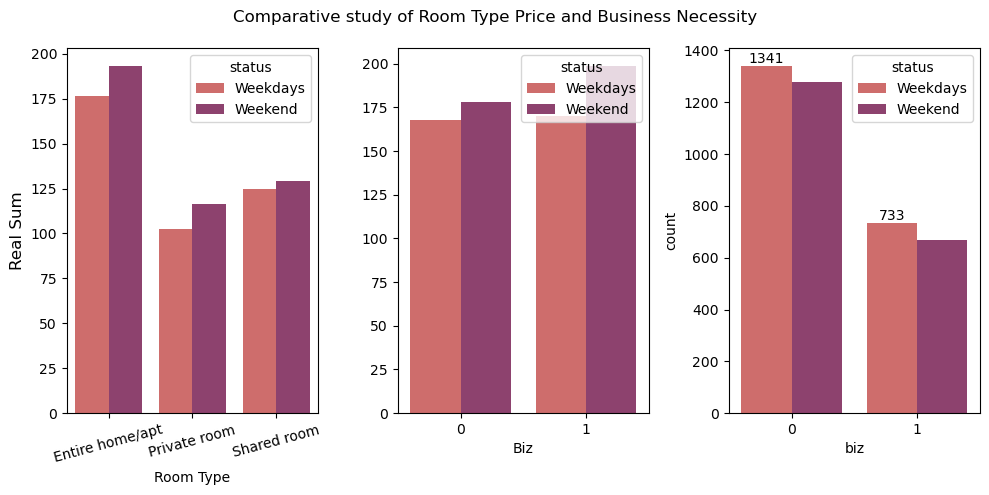

In [7]:
biz=pd.DataFrame(df.groupby(['biz', 'status'])['realSum'].mean()).reset_index()
weeks= pd.DataFrame(df.groupby(['room_type', 'status'])['realSum'].mean()).reset_index()

fig, (ax1,ax2, ax3)= plt.subplots(1,3, figsize=(10,5))
plt.suptitle('Comparative study of Room Type Price and Business Necessity')

sns.barplot(x='biz', y= 'realSum', hue= 'status', data=biz, palette= 'flare', ax= ax2)
sns.barplot(x='room_type',y= 'realSum', hue='status', data= weeks,palette= 'flare', ax= ax1)
sns.countplot(x='biz', hue='status', data= df,ax= ax3, palette= 'flare' )

ax1.set_xlabel('Room Type')
for tick in ax1.get_xticklabels():
    tick.set_rotation(15)
ax2.set_xlabel('Biz')
ax3.bar_label(ax3.containers[0])
ax1.set_ylabel('Real Sum',size=12)
ax2.set_ylabel(ylabel=None)

plt.tight_layout();

insights:
1. The average price increases on weekends. Simply put, demand tends to increase during long weekends.
2. It affects the listing price whether for business purposes or not; it's directly proportional.
3. Business purposes tend to be carried out on weekdays because the company has its own schedule on weekdays, including business travel. Business Traveler is a lucrative market for Airbnb. 

Text(427.76515151515144, 0.5, '')

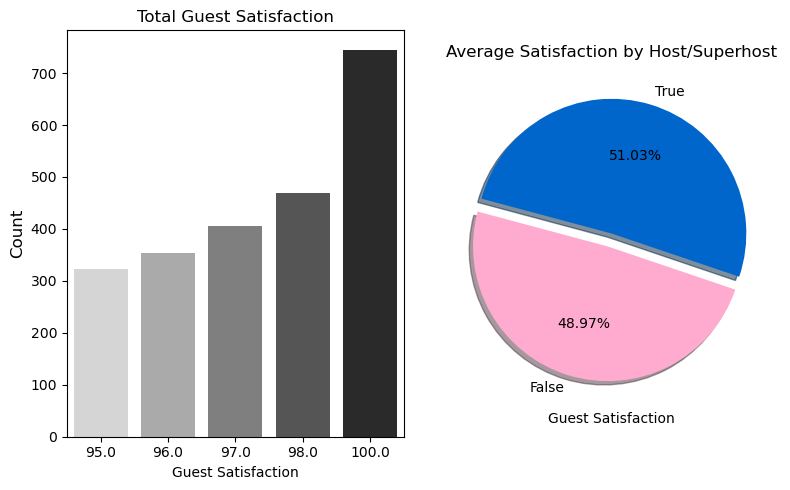

In [8]:
guest= df['guest_satisfaction_overall'].value_counts()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(8,5))
sns.barplot(x= guest.index[:5], y= guest.values[:5], data= df, ax= ax1, palette='binary')
df.groupby('host_is_superhost')['guest_satisfaction_overall'].mean().plot.pie(shadow = True, explode=[0.1, 0],
                                        autopct='%.2f%%', textprops={'fontsize':10}, 
                                        startangle=165, colors=['#FFAACF', '#0066cc'], ax= ax2)

ax1.set_xlabel('Guest Satisfaction')
ax2.set_xlabel('Guest Satisfaction')
ax1.set_ylabel('Count',size=12)
ax1.set_title('Total Guest Satisfaction')
ax2.set_title('Average Satisfaction by Host/Superhost')
plt.tight_layout()
ax2.set_ylabel(ylabel=None)

insights:
- Airbnb guests are very satisfied with the services provided.
- Airbnb superhost status has a higher average customer satisfaction rating than usual. Because being a superhost has stringent requirements, such as having a 4.8+ overall rating, 10+ stays or 100 nights, and a 1% cancellation rate, becoming one is a difficult task. The benefits are: attract more guests; gain exclusive rewards.

## SPLIT DATA 

In [9]:
df['weekend/weekdays']= df['status'].map({'Weekdays':0, 'Weekend': 1})

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('weekend/weekdays', axis= 1)
y = df['weekend/weekdays']

## DATA PREPROCESSING

In [12]:
num= X.select_dtypes(include= 'number')
num

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
0,284.344597,5.0,1,0,9.0,95.0,1,0.532188,0.151416,19.05440,47.49377
1,63.448794,2.0,0,0,10.0,99.0,1,11.715751,3.737027,19.18097,47.43755
2,151.102129,5.0,0,1,10.0,97.0,1,0.786292,0.512534,19.06448,47.49989
3,178.596607,4.0,1,0,10.0,99.0,1,0.902166,0.344801,19.05900,47.50600
4,208.911031,2.0,0,0,2.0,20.0,1,5.174894,2.121191,19.04264,47.54444
...,...,...,...,...,...,...,...,...,...,...,...
4017,117.262772,2.0,0,1,10.0,98.0,0,0.869440,0.245680,19.06010,47.50529
4018,116.087794,3.0,1,0,10.0,98.0,1,1.701825,0.278017,19.03527,47.50688
4019,150.867134,4.0,0,0,10.0,100.0,2,5.951379,2.386584,19.12009,47.52814
4020,173.191709,4.0,0,0,9.0,97.0,1,1.018788,0.346913,19.06770,47.49937


In [13]:
mapping= {True: 1, False: 0}
rt= {'Entire home/apt': 2, 'Private room': 1,'Shared room': 0}
X['room_type']= X['room_type'].map(rt)
X['room_shared']= X['room_shared'].map(mapping)
X['room_private']= X['room_private'].map(mapping)
X['host_is_superhost']= X['host_is_superhost'].map(mapping)
X['realSum']= np.log(X['realSum'])

X.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,status
0,5.650187,2,0,0,5.0,0,1,0,9.0,95.0,1,0.532188,0.151416,19.05440,47.49377,Weekdays
1,4.150233,2,0,0,2.0,1,0,0,10.0,99.0,1,11.715751,3.737027,19.18097,47.43755,Weekdays
2,5.017956,2,0,0,5.0,1,0,1,10.0,97.0,1,0.786292,0.512534,19.06448,47.49989,Weekend
3,5.185130,2,0,0,4.0,1,1,0,10.0,99.0,1,0.902166,0.344801,19.05900,47.50600,Weekdays
4,5.341908,1,0,1,2.0,0,0,0,2.0,20.0,1,5.174894,2.121191,19.04264,47.54444,Weekdays


In [14]:
X= X.drop('status', axis= 1)

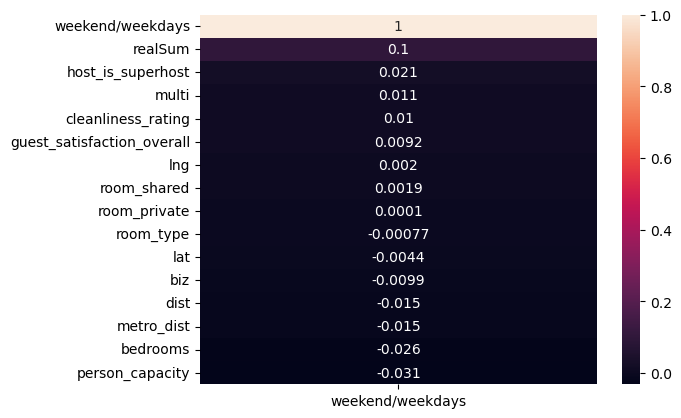

In [15]:
gabung= X.join(y)
gabung
sns.heatmap(gabung.corr()[['weekend/weekdays']].sort_values(by= ['weekend/weekdays'], ascending= False), annot = True);

## LOGISTIC REGRESSION

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 0)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [19]:
predictions = logmodel.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=logmodel.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=predictions))

Train data accuracy: 0.5623445825932505
Test data accuracy: 0.5824357912178956


- Test Accuracy : 58.2%.

In [22]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.60      0.64      0.62       644
           1       0.56      0.52      0.54       563

    accuracy                           0.58      1207
   macro avg       0.58      0.58      0.58      1207
weighted avg       0.58      0.58      0.58      1207



- Accuracy of 58%, the model does not adequately explain the prediction results. 
F1-Score:
1. the model predicts `weekdays` correctly 62%.
2. the model correctly predicts `weekend` by 54%.

In [27]:
imp_feat= logmodel.coef_[0]

In [47]:
feat= []
feat= pd.DataFrame(X.columns.values, columns= ['Feature'])
feat['score']= imp_feat
feat

,Feature,score
0,realSum,0.745059
1,room_type,-0.214774
2,room_shared,0.045194
3,room_private,0.122098
4,person_capacity,-0.078734
5,host_is_superhost,0.111613
6,multi,0.060806
7,biz,-0.096231
8,cleanliness_rating,-0.040724
9,guest_satisfaction_overall,0.001824


- **Feature importance= realSum, host_is_superhost**

<BarContainer object of 15 artists>

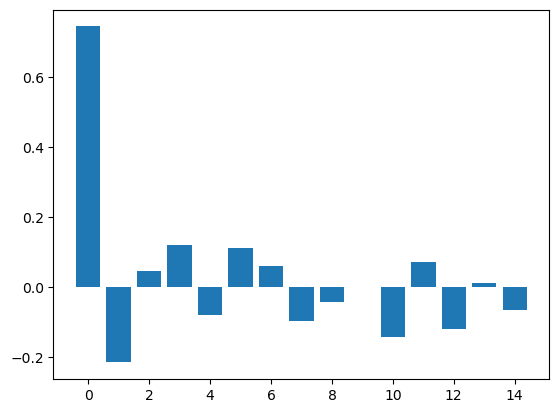

In [45]:
plt.bar([x for x in range(len(imp_feat))], imp_feat)

In [33]:
def cfm_viz(conf_matrix):
    plt.figure(figsize=(4,3))

    ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )

    ax.set_xlabel("Predicted", fontsize=9, labelpad=15)
    ax.xaxis.set_ticklabels(['Positive','Negative'])

    ax.set_ylabel("Actual", fontsize=9, labelpad=15)
    ax.yaxis.set_ticklabels(['Positive','Negative'])

    ax.set_title("Confusion Matrix Model", fontsize=14, pad=20)

    plt.show()

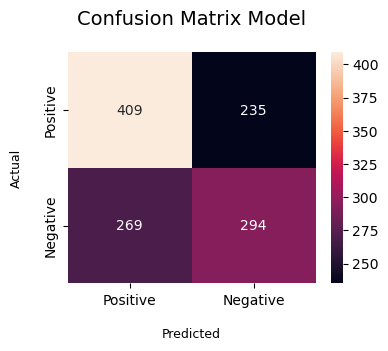

In [34]:
conf_matrix=confusion_matrix(y_test,predictions)
cfm_viz(conf_matrix)

insights:
- The predicted number of listings on Weekend is 408 listings. Meanwhile, on weekdays there were 294 listings.

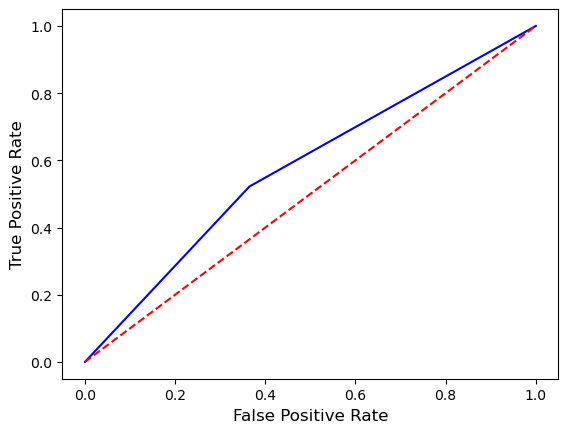

NameError: name 'y_pred' is not defined

In [49]:
from sklearn.metrics import roc_auc_score
def predict_proba(x):
    return(np.random.uniform(0, 1, x.shape[0]))

def roc_curve(y, prob):
    tpr_list = []
    fpr_list = []
    threshold = np.linspace(1.1, 0, 10)
    for t in threshold:
        y_pred = np.zeros(y.shape[0])
        y_pred[prob >= t] = 1
        TN = y_pred[(y_pred == y) & (y == 0)].shape[0]
        TP = y_pred[(y_pred == y) & (y == 1)].shape[0]
        FP = y_pred[(y_pred != y) & (y == 0)].shape[0]
        FN = y_pred[(y_pred != y) & (y == 1)].shape[0]
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        tpr_list.append(TPR)
        fpr_list.append(FPR)
    return fpr_list, tpr_list, threshold

#prob = predict_proba(x)
fpr, tpr, threshold = roc_curve(y_test, predictions)

plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)

plt.show()
roc_auc_score(y_test, y_pred)

- the curve is approaching the baseline line or the transverse line. Bad curve and not effisien for this data

## OTHER MODEL

## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[262 382]
 [346 217]]


insights:
- The predicted number of listings for the weekend is 293 listings. Meanwhile, on weekdays, there were 261 listings.

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42       644
           1       0.36      0.39      0.37       563

    accuracy                           0.40      1207
   macro avg       0.40      0.40      0.40      1207
weighted avg       0.40      0.40      0.40      1207



### DECIDE ERROR RATE

In [53]:
error_rate = [] 
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

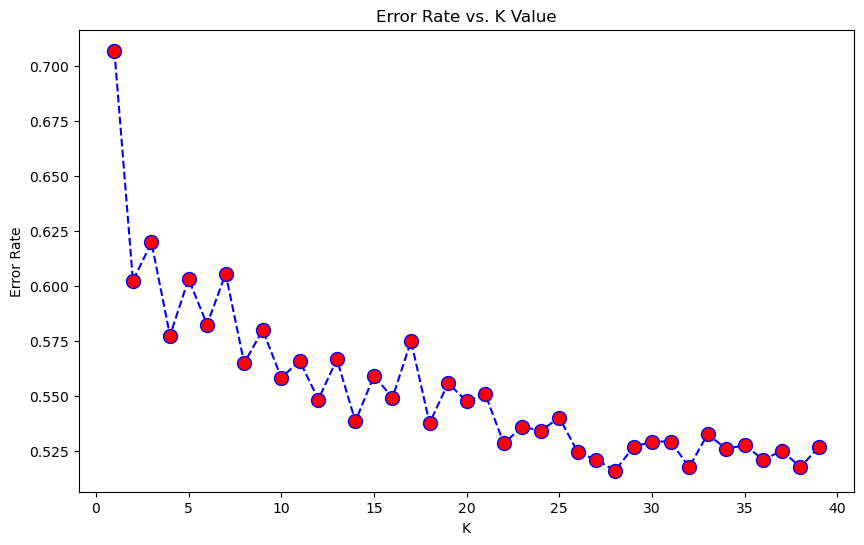

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[333 311]
 [318 245]]


              precision    recall  f1-score   support

           0       0.51      0.52      0.51       644
           1       0.44      0.44      0.44       563

    accuracy                           0.48      1207
   macro avg       0.48      0.48      0.48      1207
weighted avg       0.48      0.48      0.48      1207



insights:
- Accuracy of 48%

## CONCLUSION

1. The average price increases on weekends, whether for business purposes or not; it's directly proportional.
2. Airbnb superhost status has a higher average customer satisfaction rating because of its strict criteria.
3. Logistic regression accuracy without feature selection is 58%; KNN accuracy with an error rate of 37 is 47%. So it can be concluded that for this dataset, the best model to use is logistic regression.
4. Based on this data classification, they tend to rely on precision because they want the results to be as correct as possible. This is a form of competitor analysis and price competition for other Airbnb host in Budapest on Weekdays or Weekend.

Suggestions:
- The number of listings on weekends will be more profitable without superhost status, namely by adding facilities and providing the best service.